In [25]:
# Importing necessary libraries for text preprocessing, modeling, and visualization

import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Defining the input text data that will be used to train the CBOW model
data = """Artificial intelligence is transforming the world rapidly. It helps machines learn from experience and perform human-like tasks. AI systems can analyze data, recognize patterns, and make intelligent decisions. Machine learning and deep learning are subfields of AI. These technologies are used in healthcare, finance, and robotics."""


In [27]:
data

'Artificial intelligence is transforming the world rapidly. It helps machines learn from experience and perform human-like tasks. AI systems can analyze data, recognize patterns, and make intelligent decisions. Machine learning and deep learning are subfields of AI. These technologies are used in healthcare, finance, and robotics.'

In [28]:
# Seperating the text into sentences for further processing
sentences = data.split('.')

In [29]:
sentences

['Artificial intelligence is transforming the world rapidly',
 ' It helps machines learn from experience and perform human-like tasks',
 ' AI systems can analyze data, recognize patterns, and make intelligent decisions',
 ' Machine learning and deep learning are subfields of AI',
 ' These technologies are used in healthcare, finance, and robotics',
 '']

In [30]:
# Cleaning and preprocessing each sentence
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

In [31]:
clean_sent

['artificial intelligence is transforming the world rapidly',
 'it helps machines learn from experience and perform human like tasks',
 'ai systems can analyze data recognize patterns and make intelligent decisions',
 'machine learning and deep learning are subfields of ai',
 'these technologies are used in healthcare finance and robotics']

In [32]:
# Tokenizing the text data into integer sequences
tokenizer = Tokenizer()
# Fitting the tokenizer on the cleaned sentences and converting them to sequences
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print("\nSequences: ",sequences)


Sequences:  [[5, 6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17, 1, 18, 19, 20, 21], [2, 22, 23, 24, 25, 26, 27, 1, 28, 29, 30], [31, 3, 1, 32, 3, 4, 33, 34, 2], [35, 36, 4, 37, 38, 39, 40, 1, 41]]


In [33]:
# Creating word-index mappings
index_to_word = {}
word_to_index = {}

In [34]:
# Mapping words to their corresponding indices and vice versa

for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()
    #     print(word_in_sentence)

    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print("\nWord to Index: ",word_to_index)
print("\nIndex to Word: ",index_to_word)


Word to Index:  {'artificial': 5, 'intelligence': 6, 'is': 7, 'transforming': 8, 'the': 9, 'world': 10, 'rapidly': 11, 'it': 12, 'helps': 13, 'machines': 14, 'learn': 15, 'from': 16, 'experience': 17, 'and': 1, 'perform': 18, 'human': 19, 'like': 20, 'tasks': 21, 'ai': 2, 'systems': 22, 'can': 23, 'analyze': 24, 'data': 25, 'recognize': 26, 'patterns': 27, 'make': 28, 'intelligent': 29, 'decisions': 30, 'machine': 31, 'learning': 3, 'deep': 32, 'are': 4, 'subfields': 33, 'of': 34, 'these': 35, 'technologies': 36, 'used': 37, 'in': 38, 'healthcare': 39, 'finance': 40, 'robotics': 41}

Index to Word:  {5: 'artificial', 6: 'intelligence', 7: 'is', 8: 'transforming', 9: 'the', 10: 'world', 11: 'rapidly', 12: 'it', 13: 'helps', 14: 'machines', 15: 'learn', 16: 'from', 17: 'experience', 1: 'and', 18: 'perform', 19: 'human', 20: 'like', 21: 'tasks', 2: 'ai', 22: 'systems', 23: 'can', 24: 'analyze', 25: 'data', 26: 'recognize', 27: 'patterns', 28: 'make', 29: 'intelligent', 30: 'decisions', 3

In [35]:
 # Defining model parameters
 vocab_size = len(tokenizer.word_index) + 1
 emb_size = 10
 context_size = 4

In [36]:
# Generating context-target pairs for CBOW model training
contexts = []
targets = []
for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
         #         print(context)
        contexts.append(context)
        targets.append(target)

In [37]:
 print(contexts, "\n")
 print(targets)

[[14, 15, 17, 1], [15, 16, 1, 18], [16, 17, 18, 19], [23, 24, 26, 27], [24, 25, 27, 1], [25, 26, 1, 28], [1, 32, 4, 33], [4, 37, 39, 40]] 

[16, 17, 1, 25, 26, 27, 3, 38]


In [38]:
# Training the CBOW model on the generated context and target pairs
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['machines', 'learn', 'experience', 'and']  ->  from
['learn', 'from', 'and', 'perform']  ->  experience
['from', 'experience', 'perform', 'human']  ->  and
['can', 'analyze', 'recognize', 'patterns']  ->  data
['analyze', 'data', 'patterns', 'and']  ->  recognize


In [39]:
X = np.array(contexts)
Y = np.array(targets)

In [40]:
# Defining the CBOW model architecture
model = Sequential([
# Embedding layer to learn word vector representations
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
 ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [41]:
# Compiling the CBOW model with appropriate loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])

# Training the CBOW model on the generated context and target pairs
history = model.fit(X, Y, epochs=40,verbose=0)

<Axes: >

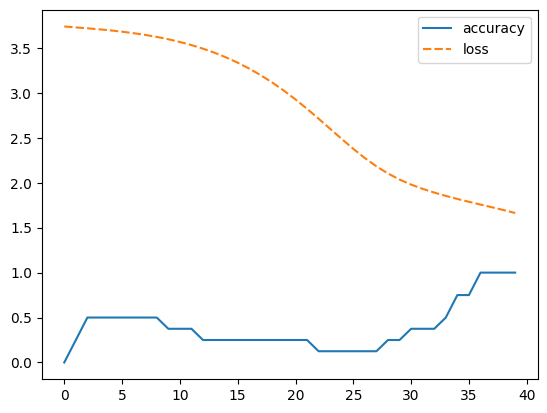

In [42]:
# Visualizing the training history of the CBOW model
sns.lineplot(model.history.history)

In [43]:
# test model: select some sentences from above paragraph
test_sentences = [
    "artificial intelligence is transforming",
    "machines learn from",
    "analyze data recognize and",
]

In [44]:
# Making predictions using the trained CBOW model

print("\n Predictions:\n")

for sent in test_sentences:
    test_words = sent.split(" ")
    x_test = [word_to_index.get(i, 0) for i in test_words]
    x_test = np.array([x_test])
    pred = model.predict(x_test, verbose=0)
    pred = np.argmax(pred[0])
    print(f"Input: {test_words}\n→ Predicted next word: {index_to_word.get(pred)}\n")


 Predictions:

Input: ['artificial', 'intelligence', 'is', 'transforming']
→ Predicted next word: data

Input: ['machines', 'learn', 'from']
→ Predicted next word: experience

Input: ['analyze', 'data', 'recognize', 'and']
→ Predicted next word: patterns

